In [282]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from glob import glob
from skimage.segmentation import mark_boundaries
import os

def compute_dice_coefficient(mask_gt, mask_pred):
  """Computes soerensen-dice coefficient.

  compute the soerensen-dice coefficient between the ground truth mask `mask_gt`
  and the predicted mask `mask_pred`.

  Args:
    mask_gt: 3-dim Numpy array of type bool. The ground truth mask.
    mask_pred: 3-dim Numpy array of type bool. The predicted mask.

  Returns:
    the dice coeffcient as float. If both masks are empty, the result is NaN.
  """
  volume_sum = mask_gt.sum() + mask_pred.sum()
  if volume_sum == 0:
    return 1
  volume_intersect = (mask_gt & mask_pred).sum()
  return 2*volume_intersect / volume_sum 

def change_arr(true, pred):
  pred = pred*5+3
  
  arr = pred + true
  arr = np.where(arr == 9, 0, arr)
  arr = np.where(arr == 3, 1, arr)
  arr = np.where(arr == 8, 2, arr)
  arr = np.where(arr == 4, 3, arr)
  
  return arr
  

In [283]:
images = glob('/home/pablo.mas/code/seg-gini_bis/images/*')
segmentation_masks = glob('/home/pablo.mas/code/seg-gini_bis/annotation_masks/annotation_masks_100/*')
tissue_masks = glob('/home/pablo.mas/code/seg-gini_bis/preds/tissue_mask/*')
graphs = glob('/home/pablo.mas/code/gnn/datasets/256x256/A1702076/preprocess/graphs_viz/*')
predictions = glob('/home/pablo.mas/code/seg-gini_bis/preds/prediction/*')
instance_maps = glob('/home/pablo.mas/code/seg-gini_bis/preds/instance_map/')
prediction_names = [x.split('/')[-1].split('.')[0] for x in predictions]

# patch_0002_c4

In [290]:
VIZ_PATH = f'/home/pablo.mas/code/seg-gini_bis/viz/'

os.makedirs(VIZ_PATH, exist_ok=True)
for IMAGE_NAME in prediction_names:
    print(IMAGE_NAME)
    image = np.array(Image.open(f'/home/pablo.mas/code/seg-gini_bis/images/{IMAGE_NAME}.png'))
    segmentation_mask = np.array(Image.open(f'/home/pablo.mas/code/seg-gini_bis/annotation_masks/annotation_masks_100/{IMAGE_NAME}.png'))
    tissue_mask = np.load(f'/home/pablo.mas/code/seg-gini_bis/preds/tissue_mask/{IMAGE_NAME}.npy')
    graph = np.array(Image.open(f'/home/pablo.mas/code/gnn/datasets/256x256/A1702076/preprocess/graphs_viz/{IMAGE_NAME}.png'))
    prediction = np.load(f'/home/pablo.mas/code/seg-gini_bis/preds/prediction/{IMAGE_NAME}.npy')
    instance_map = np.load(f'/home/pablo.mas/code/seg-gini_bis/preds/instance_map/{IMAGE_NAME}.npy')

    fig1, ax1 = plt.subplots(1, 3, figsize=(15, 5))
    ax1 = np.ravel(ax1)

    ax1[0].imshow(image)
    ax1[0].set_title('Image (Macenko normalization)', fontsize=15)
    ax1[0].axis('off')

    ax1[1].imshow(mark_boundaries(image, instance_map, color=(0, 0, 0)))
    ax1[1].set_title('Instance map (SLIC Algorithm)', fontsize=15)
    ax1[1].axis('off')

    ax1[2].imshow(graph)
    ax1[2].set_title('Graph (Region Adjacency Graph)' , fontsize=15)
    ax1[2].axis('off')

    fig1.suptitle(f'{IMAGE_NAME} - Dice : {round(compute_dice_coefficient(segmentation_mask, prediction), 5)}', fontsize=21)

    plt.savefig(VIZ_PATH + f'fig1_{IMAGE_NAME}.png', dpi=300)
    plt.close()

    fig2, ax2 = plt.subplots(1, 2, figsize=(10, 5))
    ax2[0].imshow(segmentation_mask)
    ax2[0].set_title('Ground truth', fontsize=15)
    ax2[0].axis('off')

    ax2[1].imshow(prediction)
    ax2[1].set_title('Prediction', fontsize=15)
    ax2[1].axis('off')

    # cbar  = fig.colorbar(mappable=ax[5], ticks=[0, 1, 2, 3])
    plt.suptitle(f'{IMAGE_NAME} - Dice : {round(compute_dice_coefficient(segmentation_mask, prediction), 5)}', fontsize=20)
    plt.savefig(VIZ_PATH + f'fig2_{IMAGE_NAME}.png', dpi=300)
    plt.close()

    arr = change_arr(segmentation_mask, prediction)

    cmap = plt.cm.viridis
    norm = colors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], cmap.N)

    plt.figure(figsize=(6, 5))
    plt.imshow(arr, cmap=cmap, norm=norm)
    plt.axis('off')
    cbar = plt.colorbar(ticks=[0, 1, 2, 3])
    cbar.set_ticklabels(['TP', 'TN', 'FP', 'FN'])

    plt.title(f'{IMAGE_NAME} - Dice : {round(compute_dice_coefficient(segmentation_mask, prediction), 5)}')
    plt.savefig(VIZ_PATH + f'fig3_{IMAGE_NAME}.png', dpi=300)
    plt.close()


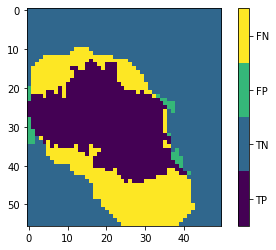

In [271]:
plt.imshow(arr[200:, :50], cmap=cmap, norm=norm)
cbar = plt.colorbar(ticks=[0, 1, 2, 3])
cbar.set_ticklabels(['TP', 'TN', 'FP', 'FN'])
# plt.axis('off')

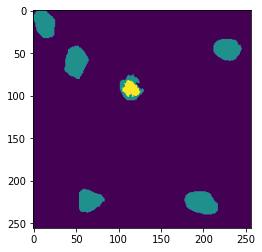

In [59]:
plt.imshow(prediction+segmentation_mask)